In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
import plotly.express as px

In [4]:
df= pd.read_csv('../data/Books_final(cleaned).csv')

In [5]:
df.head()

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,['Αυτοβοήθεια'],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,['Ισπανικά'],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,['Φωτογραφία'],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,['Χόμπι'],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"['Φιλοσοφία', 'Κοινωνιολογία', 'Θρησκεία']",9789604304264,208.0,Χαρτόδετο


In [6]:
df['Category'] = df['Category'].apply(lambda s : re.sub("'","",s))

df['Category'] = df['Category'].apply(lambda s : re.sub("[\[\]']","",s))

df['Category'] = df['Category'].str.split(',')

## Let's find the top category pairs and their quantities

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
dff =df.copy()

In [9]:
categories = list(set(list(dff['Category'].explode().values)))

In [10]:
def check_string(lst, word):
    if lst is np.nan:
        pass
    elif lst.count(word):
        return 1
    else:
        return 0

In [11]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: check_string(x, cat), dff['Category']))

dff.head()

  0%|          | 0/109 [00:00<?, ?it/s]

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding,Αγγλικά,Χάρτες,ΕναλλακτικέςΘεραπείες,Ποίηση,Νουβέλα,ΛατινικήΓραμματεία,Χριστιανισμός,Ιατρική,Οικονομικά,ΚλασικήΠεζογραφία,ΜεταφρασμένηΠοίηση,ΑνατολικήΣκέψη,Μαθηματικά,Εκπαίδευση,Θέατρο,ΑρχαίαΕλληνικήΓραμματεία,Κρασί,Ιστορία,Φιλοσοφία,Γλωσσολογία,Χορός,Πολιτική,ΓενικάΛεξικά,Θρησκεία,Ψυχιατρική,Δοκίμια,Κινηματογράφος,Φωτογραφία,ΓιαΜωρά,Πληροφορική,Ξενόγλωσσα,Παιδαγωγική,Ζωγραφική,Οδηγοί,ΕργασιακέςΣχέσεις,Γάμος,ΕφηβικήΛογοτεχνία,Αυτοβιογραφίες,Βιογραφίες,Παραμύθια,Αρχιτεκτονική,Κινηματογράφος,Λύκειο,Κοινωνιολογία,Κόμιξ,Μύθοι,Ημερολόγια,ΕλεύθεροςΧρόνος,Αθλητισμός,Μαγειρική,Δραστηριοτήτων,Σχέσεις,Βυζάντιο,ΤαξιδιωτικοίΟδηγοί,ΕυρωπαϊκήΦιλοσοφία,Ψυχολογία,Μυθολογία,Φυσικές&ΘετικέςΕπιστήμες,ΕκλαϊκευμένηΕπιστήμη,Διήγημα,Αποκρυφισμός,Τεχνικά,Ψυχανάλυση,Αυτοβοήθεια,ΤαξιδιωτικήΛογοτεχνία,Παιδικά,Νομική,Προϊστορία,Μυθιστόρημα,Διαδραστικά,ΚλασικήΦιλολογία,ΞένεςΓλώσσες,Αθλητισμός,Μεταφυσική,Σημειωματάρια,Γυμνάσιο,Ταξίδια,ΣχολικάΒοηθήματα,Ποτό,ΕλληνικήΠοίηση,GraphicNovels,Φυσική,Γαλλικά,ΚοινωνικάΠροβλήματα,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,ΙσότηταΦύλων,ΠροσχολικήΗλικία,Πεζογραφία,Χόμπι,Συνταγές,Διατροφή,ΕλληνικήΓλώσσα,Οικονομία,Δημοτικό,Ισπανικά,Μουσική,ΑρχαίοιΈλληνεςΦιλόσοφοι,Οικογένεια,Λεξικά&Εγκυκλοπαίδειες,Θέατρο,Μαρτυρίες,Γερμανικά,ΒυζαντινήΓραμματεία,Ανθρωπολογία,Εφηβικά,Εθνολογία,ΠαγκόσμιαΙστορία,Τέχνες,ΕλληνικήΕπανάσταση
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,[Αυτοβοήθεια],9789604617005,240.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,[Ισπανικά],9788498484410,320.0,Μαλακό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,[Φωτογραφία],9789608152236,164.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,[Χόμπι],9786185116224,80.0,Σκληρό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"[Φιλοσοφία, Κοινωνιολογία, Θρησκεία]",9789604304264,208.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
def convert_nums(x, cat):
    if x is np.nan:
        return np.nan
    elif x == 1:
        return cat
    else:
        return np.nan

In [13]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: convert_nums(x, cat), dff[cat]))

  0%|          | 0/109 [00:00<?, ?it/s]

In [14]:
df_new = dff[list(dff.columns[11:])].reset_index().copy()
df_new = df_new.drop('index', 1)
df_new = df_new.fillna("")
df_new.head()

,Αγγλικά,Χάρτες,ΕναλλακτικέςΘεραπείες,Ποίηση,Νουβέλα,ΛατινικήΓραμματεία,Χριστιανισμός,Ιατρική,Οικονομικά,ΚλασικήΠεζογραφία,ΜεταφρασμένηΠοίηση,ΑνατολικήΣκέψη,Μαθηματικά,Εκπαίδευση,Θέατρο,ΑρχαίαΕλληνικήΓραμματεία,Κρασί,Ιστορία,Φιλοσοφία,Γλωσσολογία,Χορός,Πολιτική,ΓενικάΛεξικά,Θρησκεία,Ψυχιατρική,Δοκίμια,Κινηματογράφος,Φωτογραφία,ΓιαΜωρά,Πληροφορική,Ξενόγλωσσα,Παιδαγωγική,Ζωγραφική,Οδηγοί,ΕργασιακέςΣχέσεις,Γάμος,ΕφηβικήΛογοτεχνία,Αυτοβιογραφίες,Βιογραφίες,Παραμύθια,Αρχιτεκτονική,Κινηματογράφος,Λύκειο,Κοινωνιολογία,Κόμιξ,Μύθοι,Ημερολόγια,ΕλεύθεροςΧρόνος,Αθλητισμός,Μαγειρική,Δραστηριοτήτων,Σχέσεις,Βυζάντιο,ΤαξιδιωτικοίΟδηγοί,ΕυρωπαϊκήΦιλοσοφία,Ψυχολογία,Μυθολογία,Φυσικές&ΘετικέςΕπιστήμες,ΕκλαϊκευμένηΕπιστήμη,Διήγημα,Αποκρυφισμός,Τεχνικά,Ψυχανάλυση,Αυτοβοήθεια,ΤαξιδιωτικήΛογοτεχνία,Παιδικά,Νομική,Προϊστορία,Μυθιστόρημα,Διαδραστικά,ΚλασικήΦιλολογία,ΞένεςΓλώσσες,Αθλητισμός,Μεταφυσική,Σημειωματάρια,Γυμνάσιο,Ταξίδια,ΣχολικάΒοηθήματα,Ποτό,ΕλληνικήΠοίηση,GraphicNovels,Φυσική,Γαλλικά,ΚοινωνικάΠροβλήματα,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,ΙσότηταΦύλων,ΠροσχολικήΗλικία,Πεζογραφία,Χόμπι,Συνταγές,Διατροφή,ΕλληνικήΓλώσσα,Οικονομία,Δημοτικό,Ισπανικά,Μουσική,ΑρχαίοιΈλληνεςΦιλόσοφοι,Οικογένεια,Λεξικά&Εγκυκλοπαίδειες,Θέατρο,Μαρτυρίες,Γερμανικά,ΒυζαντινήΓραμματεία,Ανθρωπολογία,Εφηβικά,Εθνολογία,ΠαγκόσμιαΙστορία,Τέχνες,ΕλληνικήΕπανάσταση
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Αυτοβοήθεια,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Ισπανικά,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,Φωτογραφία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Χόμπι,,,,,,,,,,,,,,,,,,,,
4,,,,,,,,,,,,,,,,,,,Φιλοσοφία,,,,,Θρησκεία,,,,,,,,,,,,,,,,,,,,Κοινωνιολογία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [15]:
from collections import Counter
from itertools import combinations

In [16]:
n = 200
K = Counter([l for i in df_new.values for l in combinations([p for p in i if p != ''], 2)]).most_common()

df1 = pd.DataFrame(K, columns=['Pair', 'Qty'])
df1.head(20)

,Pair,Qty
0,"(Φιλοσοφία, Θρησκεία)",2076
1,"(Φιλοσοφία, Κοινωνιολογία)",2076
2,"( Θρησκεία, Κοινωνιολογία)",2076
3,"(Εκπαίδευση, Παιδαγωγική)",1600
4,"(Πολιτική, Οικονομία)",1294
5,"(Παιδικά, Εφηβικά)",1245
6,"(Ψυχολογία, Ψυχανάλυση)",699
7,"(Φυσικές&ΘετικέςΕπιστήμες, Τεχνικά)",535
8,"( Μαθηματικά, Φυσική)",405
9,"( Θέατρο, Κινηματογράφος)",227


## _Plotting the results_

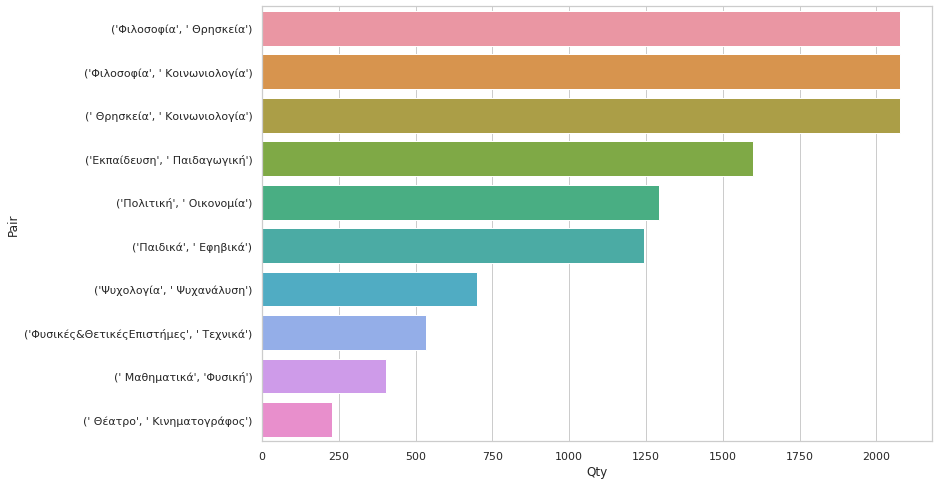

In [26]:
plt.figure(figsize=[12,8])
sns.set(style='whitegrid', palette='flare')
sns.barplot(data= df1.head(10), x='Qty', y='Pair')
plt.show()

In [18]:
df2 = df1.copy()
df2['Pair'] = df2['Pair'].str.join(' ')

In [19]:
df2.to_csv('for_dash.csv',index=False)

In [20]:
df.head()

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,[Αυτοβοήθεια],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,[Ισπανικά],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,[Φωτογραφία],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,[Χόμπι],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"[Φιλοσοφία, Κοινωνιολογία, Θρησκεία]",9789604304264,208.0,Χαρτόδετο


In [21]:
fp = pd.DataFrame(df.Author.value_counts())

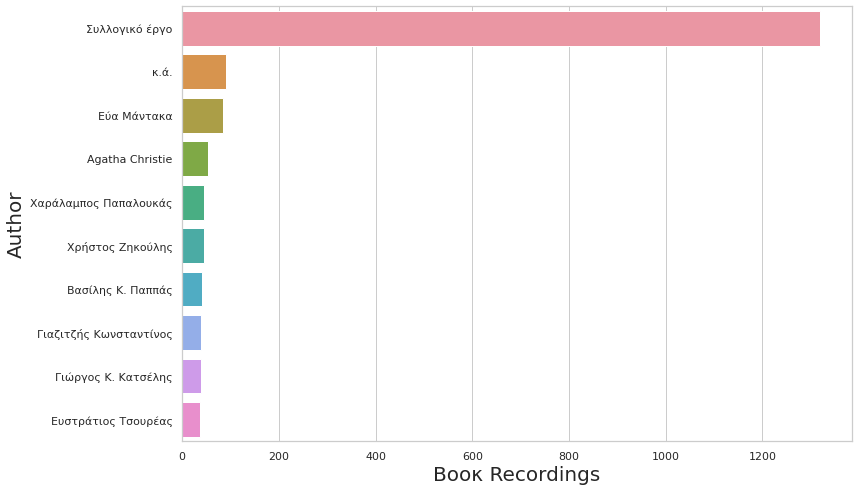

In [27]:
plt.figure(figsize=[12,8])
sns.barplot(data= fp.head(10), x = 'Author', y=fp.head(10).index)
plt.xlabel('Βοοκ Recordings', fontsize=20)
plt.ylabel('Author',fontsize=20)
plt.show()

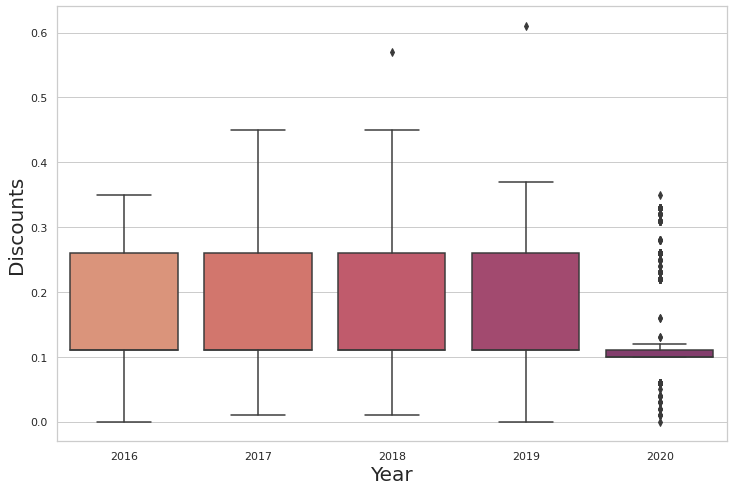

In [28]:
plt.figure(figsize=[12,8])
sns.boxplot(data=df, x= 'Year', y= 'Discount')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Discounts', fontsize=20)
plt.show()

In [24]:
df3= df[(df['Year']==2016)]

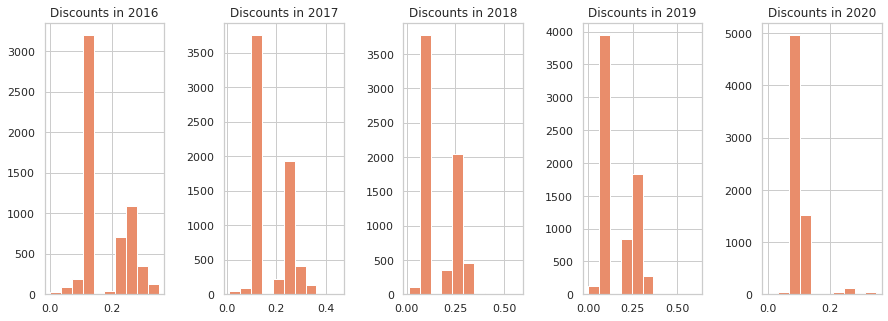

In [29]:
years=[2016,2017,2018,2019,2020]

c=1
plt.figure(figsize=(15, 5))

for year in years:
        df3=df[(df['Year'] == year)]
        plt.subplot(1,5,c)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        name = "Discounts in " + str(year)
        plt.title(name)
        plt.hist(df3['Discount'])
        c += 1

plt.show()

In [31]:
fp

,Author
Συλλογικό έργο,1319
κ.ά.,90
Εύα Μάντακα,84
Agatha Christie,53
Χαράλαμπος Παπαλουκάς,46
...,...
Nahas Sylvaine,1
Λευτέρης Μαργωμένος,1
Κωνσταντίνος Δεμέτζος,1
Henry Tischler,1
